# An end-to-end example: A linear classifier in pure TensorFlow
### Ref: François Chollet - Deep Learning with Python

In [ ]:
import tensorflow as tf
import numpy as np

In [3]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

In [4]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))

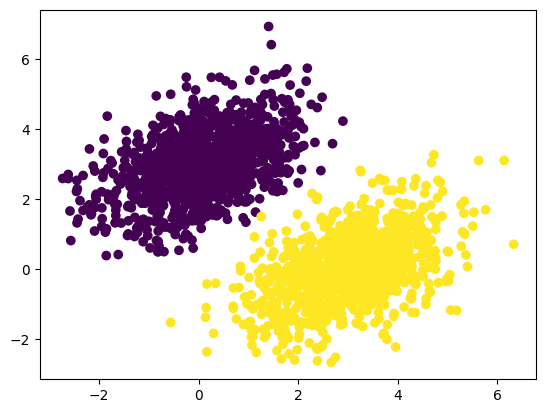

In [5]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [7]:
input_dim = 2 # 2D points
output_dim = 1 # single score per sample
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [9]:
def model(inputs):
    "Simple linear model W*x + b"
    return tf.matmul(inputs, W)  + b

In [10]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(target - predictions)
    return tf.reduce_mean(per_sample_losses)

In [11]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [12]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [14]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 1.2133
Loss at step 1: 0.2690
Loss at step 2: 0.1284
Loss at step 3: 0.1029
Loss at step 4: 0.0942
Loss at step 5: 0.0884
Loss at step 6: 0.0833
Loss at step 7: 0.0787
Loss at step 8: 0.0744
Loss at step 9: 0.0705
Loss at step 10: 0.0669
Loss at step 11: 0.0636
Loss at step 12: 0.0606
Loss at step 13: 0.0578
Loss at step 14: 0.0553
Loss at step 15: 0.0529
Loss at step 16: 0.0508
Loss at step 17: 0.0488
Loss at step 18: 0.0470
Loss at step 19: 0.0453
Loss at step 20: 0.0438
Loss at step 21: 0.0424
Loss at step 22: 0.0411
Loss at step 23: 0.0399
Loss at step 24: 0.0388
Loss at step 25: 0.0378
Loss at step 26: 0.0369
Loss at step 27: 0.0360
Loss at step 28: 0.0352
Loss at step 29: 0.0345
Loss at step 30: 0.0339
Loss at step 31: 0.0333
Loss at step 32: 0.0327
Loss at step 33: 0.0322
Loss at step 34: 0.0317
Loss at step 35: 0.0313
Loss at step 36: 0.0309
Loss at step 37: 0.0305
Loss at step 38: 0.0302
Loss at step 39: 0.0299


### Ploting the linear classifier

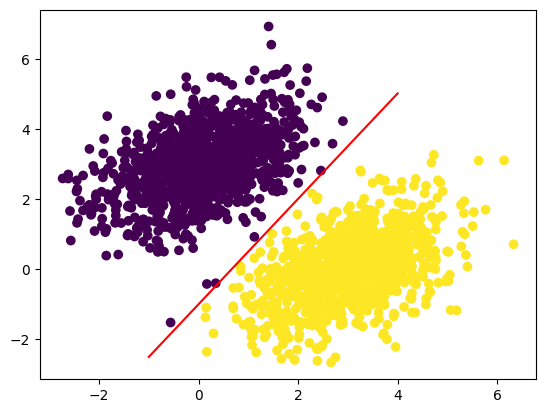

In [16]:
predictions = model(inputs)
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()